# Taylor Rule

*By Nathan Ramos, CFA*

The Taylor Rule is a monetary policy rule that stipulates how much the central bank should change the nominal interest rate in response to changes in inflation, output, or other economic conditions. This rule is intended to stabilize the economy by adjusting interest rates when inflation is above or below a target level or when GDP is above or below its potential level.

In this notebook, we will use the `pyeconomics` package to calculate the Taylor Rule based on real-time data fetched from the FRED database. We will look at both the current rate calculation and historical trends.

## Importing Necessary Libraries

Before we begin the computations, we need to import the necessary libraries that will enable us to fetch data, perform calculations, and visualize results. This includes libraries for data manipulation, API access, and plotting.

In [1]:
# Import standard libraries
import os
import sys

# Configure system path
sys.path.insert(0, os.path.abspath('../../'))

# Import third-party libraries
import matplotlib.pyplot as plt
import pandas as pd

# Import pyeconomics modules
import pyeconomics as pyecon

# Set up display for plots in a Jupyter notebook
%matplotlib inline

## Configuring API Access to FRED

To leverage the real-time data fetching capabilities of the `pyeconomics` package for Taylor Rule calculations, configure your FRED API access by [securely setting up your API key](../api_configuration/fred_api_configuration.ipynb). A detailed step-by-step guide on obtaining and securely storing your FRED API key with the `keyring` library is available in our dedicated notebook, ensuring compliance with FRED's security policies and preventing unauthorized access.

## FRED Series IDs for Economic Data

This section defines the series identifiers (IDs) used to fetch economic data from the FRED (Federal Reserve Economic Data) database. Adjusting these IDs allows users to select different data series that best match their analysis needs or data availability. The IDs set here correspond to key economic indicators relevant to the Taylor Rule calculation:

- **Inflation Series ID (`inflation_series_id`):** Points to the series used to measure the inflation rate. Currently set to track the PCE Trimmed Mean Inflation Rate.
- **Unemployment Rate Series ID (`unemployment_rate_series_id`):** Specifies the series for the unemployment rate. Here, it's set to track the general unemployment rate.
- **Natural Unemployment Series ID (`natural_unemployment_series_id`):** Indicates the series for the natural rate of unemployment, reflecting long-term unemployment unaffected by cyclical fluctuations.
- **Real Interest Rate Series ID (`real_interest_rate_series_id`):** Represents the series for the long-term real interest rate, important for assessing the real cost of borrowing.

These IDs are critical for ensuring that the Taylor Rule calculations are based on accurate and relevant economic data.

In [2]:
# FRED Series IDs for economic data
inflation_series_id = 'PCETRIM12M159SFRBDAL'
unemployment_rate_series_id = 'UNRATE'
natural_unemployment_series_id = 'NROU'
real_interest_rate_series_id = 'DFII10'

# Print the series names and their IDs
print(f"Inflation Series ID:               {pyecon.fred_client.get_series_name(inflation_series_id)}")
print(f"Unemployment Rate Series ID:       {pyecon.fred_client.get_series_name(unemployment_rate_series_id)}")
print(f"Natural Unemployment Series ID:    {pyecon.fred_client.get_series_name(natural_unemployment_series_id)}")
print(f"Real Interest Rate Series ID:      {pyecon.fred_client.get_series_name(real_interest_rate_series_id)}")

Inflation Series ID:               Trimmed Mean PCE Inflation Rate
Unemployment Rate Series ID:       Unemployment Rate
Natural Unemployment Series ID:    Noncyclical Rate of Unemployment
Real Interest Rate Series ID:      Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis, Inflation-Indexed


In [3]:
indicators = pyecon.EconomicIndicators(
    inflation_series_id=inflation_series_id,
    unemployment_rate_series_id=unemployment_rate_series_id,
    natural_unemployment_series_id=natural_unemployment_series_id,
    real_interest_rate_series_id=real_interest_rate_series_id
)

## Model Assumptions and Parameters

This section outlines the assumptions and parameters used in the Taylor Rule calculation. These values can be adjusted to simulate different economic conditions and policy responses:

- **Inflation Target (`inflation_target`):** The target inflation rate, typically set by the central bank, which guides their monetary policy objectives.
- **Alpha (α) (`alpha`):** Represents the responsiveness of the policy interest rate to the inflation gap, i.e., the difference between actual inflation and the target inflation.
- **Beta (β) (`beta`):** Indicates how sensitive the policy rate is to changes in the output gap, which is the deviation of actual GDP from its potential level.
- **Okun's Factor (`okun_factor`):** Adjusts the response to changes in the unemployment gap, based on Okun's law, which describes the relationship between changes in unemployment and GDP.
- **Rho (ρ) (`rho`):** This parameter adds inertia to the policy rate, reflecting the tendency of central banks to avoid large swings in interest rate changes.
- **Effective Lower Bound (ELB) (`elb`):** Sets a minimum value for the policy rate to prevent the recommendation of negative or impractically low interest rates.
- **Apply ELB (`apply_elb`):** A boolean control that determines whether the effective lower bound should be enforced in the Taylor Rule calculation.
- **Verbose (`verbose`):** A boolean setting that, when enabled, provides detailed output about the internal calculations and economic indicators used during the computation.

By tweaking these parameters, researchers and policymakers can explore how various theoretical adjustments might affect the recommended policy rate under the Taylor Rule.

In [4]:
# Define the Taylor Rule parameters
params = pyecon.TaylorRuleParameters(
    inflation_target=2.0,
    alpha=0.5,
    beta=0.5,
    okun_factor=2.0,
    rho=0.70,
    elb=0.125,
    apply_elb=True,
    verbose=True
)

## Current Taylor Rule Calculation Using the FRED API

This section demonstrates the computation of the current recommended interest rate according to the Taylor Rule, utilizing real-time economic indicators fetched directly from the FRED (Federal Reserve Economic Data) API. [Ensure that your API credentials are correctly configured to fetch this data.](../api_configuration/fred_api_configuration.ipynb)

### Taylor Rule Formula

In this implementation, the Taylor Rule is adapted to use unemployment data as a proxy for economic output gaps, aligning with Okun's law, which suggests a strong relationship between changes in unemployment and GDP output. The formula is expressed as:

$$
i_t = r_t + \pi_t + \alpha(\pi_t - \pi^*) + \beta \cdot \gamma \cdot (u^* - u_t)
$$

Where:
- $i_t$: Recommended policy interest rate
- $r_t$: Real neutral interest rate, typically reflecting long-term economic conditions
- $\pi_t$: Current inflation rate
- $\pi^*$: Target inflation rate, set by the central bank
- $\alpha$: Responsiveness to the inflation gap
- $\beta$: Responsiveness to the unemployment gap
- $\gamma$: Multiplier adjusting the influence of the unemployment gap
- $u^*$: Natural rate of unemployment
- $u_t$: Current unemployment rate

This approach utilizes the difference in unemployment rates to approximate the output gap. Adjusting parameters $\alpha$, $\beta$, and $\gamma$ allows policymakers to model the sensitivity of the interest rate to economic indicators.

This method provides a dynamic tool to assess how central banks might adjust interest rates in response to changing economic conditions, offering a data-driven foundation for monetary policy decisions.

In [5]:
# Current Taylor Rule calculation using FRED data
taylor_rule_estimate_fred = pyecon.taylor_rule(indicators, params)


==== Economic Indicators =================================================
Current Inflation:                               3.04%
Target Inflation:                                2.00%
Current Unemployment Rate:                       3.90%
Natural Unemployment Rate:                       4.41%
Long-Term Real Interest Rate:                    2.17%
Current Fed Rate:                                5.50%
As of Date:                                      May 27, 2024

==== Gaps ================================================================
Inflation Gap:                                   1.04%
Unemployment Gap:                                0.51%

==== Taylor Rule =========================================================
  Long-Term Real Interest Rate:                  2.17%
  Current Inflation:                             + 3.04%
  Alpha * Inflation Gap:                         + 0.50 * 1.04%
  Beta * Okun Factor * Unemployment Gap:         + 0.50 * 2.00 * 0.51%
-----------------------

## Setting Preset Economic Indicators for Stagflation Simulation

Users can manually input preset values for key economic indicators to compute the Taylor Rule interest rate. This method allows for simulations under specific economic scenarios such as stagflation, which is characterized by high inflation and unemployment alongside sluggish economic growth:

- **Current Inflation Rate:** Set at 6.0% to simulate high inflation, indicative of rising prices during economic stagnation. This reflects pressures in the economy where costs are increasing despite low growth.
- **Current Unemployment Rate:** Preset at 6.0%, adjusted to reflect high unemployment, showing substantial economic underperformance and labor market distress. This rate aligns with the pressures observed in a stagflation environment.
- **Natural Unemployment Rate:** Set at 4.5%, representing a baseline where the labor market is more stable without cyclical pressures.
- **Long-Term Real Interest Rate:** Established at 2.0%, assuming a realistic rate of return that acknowledges the complexities of the current economic conditions.
- **Federal Funds Rate:** Preset at 8.0% to demonstrate the central bank's aggressive stance to combat inflation while attempting to stimulate the economy amidst challenging conditions.

Adjust these values to simulate stagflation and explore the impact on the recommended policy interest rate using the Taylor Rule. This simulation helps to understand how central banks might respond to simultaneous pressures of inflation and unemployment.

In [6]:
# Preset values for economic indicators in a stagflation scenario
indicators_preset = pyecon.EconomicIndicators(
    current_inflation_rate=6.0,
    current_unemployment_rate=6.0,
    natural_unemployment_rate=4.5,
    long_term_real_interest_rate=2.0,
    current_fed_rate=8.0
)

In [7]:
# Calculate the Taylor Rule interest rate using the preset data
taylor_rule_estimate_preset = pyecon.taylor_rule(indicators_preset, params)


==== Economic Indicators =================================================
Current Inflation:                               6.00%
Target Inflation:                                2.00%
Current Unemployment Rate:                       6.00%
Natural Unemployment Rate:                       4.50%
Long-Term Real Interest Rate:                    2.00%
Current Fed Rate:                                8.00%
As of Date:                                      May 27, 2024

==== Gaps ================================================================
Inflation Gap:                                   4.00%
Unemployment Gap:                                -1.50%

==== Taylor Rule =========================================================
  Long-Term Real Interest Rate:                  2.00%
  Current Inflation:                             + 6.00%
  Alpha * Inflation Gap:                         + 0.50 * 4.00%
  Beta * Okun Factor * Unemployment Gap:         + 0.50 * 2.00 * -1.50%
---------------------

### Taylor Rule Application in Stagflation Scenario

The Taylor Rule calculation outputs an initial unadjusted interest rate estimate of 8.50%, which remains stable even after adjustments for the effective lower bound (ELB). The significant inflation rate of 6.00% leads to an inflation gap of 4.00%, indicating substantial price increases above the Federal Reserve's target of 2.00%. Despite the positive inflation gap, the negative unemployment gap of -1.50% (showing lower current unemployment than the natural rate) slightly moderates the upward pressure on the interest rate. 

The formula considers both the high current inflation and the unemployment dynamics, resulting in a Taylor Rule recommendation slightly above the current Federal Funds Rate of 8.00%. After considering policy inertia with a coefficient of 0.70, the final adjusted Taylor Rule estimate stands at 8.15%. This suggests that the central bank might slightly increase the interest rate from its current level to combat inflation effectively, while being mindful of the employment levels. This approach indicates a careful balancing act in managing the dual mandate of controlling inflation and supporting employment during stagflation.

## Historical Taylor Rule Calculation

Now, we will compute the Taylor Rule based on historical data sourced from the FRED API. This will allow us to see how the estimated interest rate has evolved over time.

In [8]:
# Historical Taylor Rule calculation using FRED data
historical_estimates = pyecon.historical_taylor_rule(indicators, params)

## Visualization of Historical Data

Plotting the historical Taylor Rule estimates provides visual insight into how economic policy guidance might have changed in response to economic indicators over time.

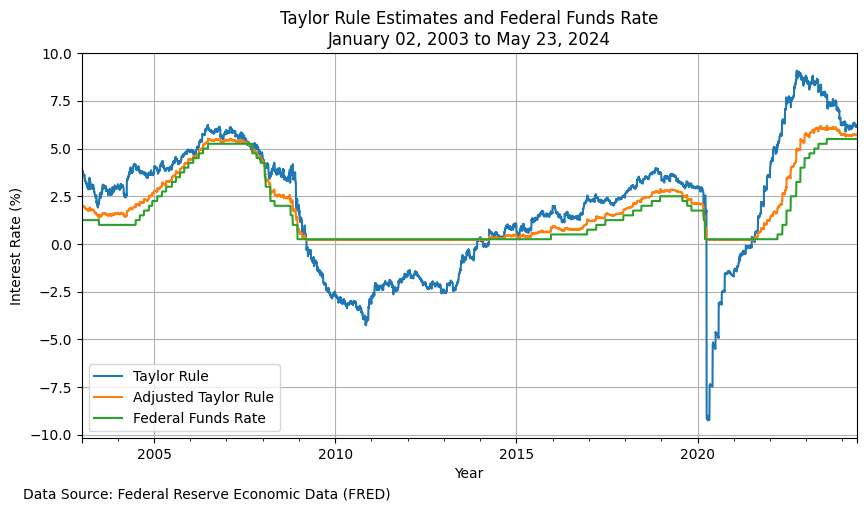

In [9]:
pyecon.plot_historical_taylor_rule(historical_estimates)

# Conclusion

This notebook demonstrates the use of the `pyeconomics` package to calculate and visualize the Taylor Rule. These tools can aid economists, policymakers, and financial analysts in understanding and predicting central bank behavior regarding interest rates.